# usage introduction of tensorflow.data.Dataset


In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

# tfds works in both Eager and Graph modes
tf.compat.v1.enable_eager_execution()

# See available datasets
print(tfds.list_builders())

# Construct a tf.data.Dataset
ds_train = tfds.load(name="mnist", split="train", shuffle_files=True)

# Build your input pipeline
ds_train = ds_train.shuffle(1000).batch(128).prefetch(10)
for features in ds_train.take(1):
  image, label = features["image"], features["label"]

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'bair_robot_pushing_small', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco2014', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'downsampled_imagenet', 'dsprites', 'dtd', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eurosat', 'fashion_mnist', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'image_label_folder', 'imagenet2012', 'imagenet2012_corrupted', 'imagenet_resized', 'imdb_reviews', 'iris', 'kitti', 'kmnist', 'lfw', 'lm1b', 'lsun', 'malaria', 'mnist'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Lib

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset mnist downloaded and prepared to /Users/xiaodong/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


## DatasetBuilder

All datasets are implemented as subclasses of DatasetBuilder and tfds.load is a thin convenience wrapper. DatasetInfo documents the dataset.

In [2]:
import tensorflow_datasets as tfds

# The following is the equivalent of the `load` call above.

# You can fetch the DatasetBuilder class by string
mnist_builder = tfds.builder('mnist')

# Download the dataset
mnist_builder.download_and_prepare()

# Construct a tf.data.Dataset
ds = mnist_builder.as_dataset(split='train')

# Get the `DatasetInfo` object, which contains useful information about the
# dataset and its features
info = mnist_builder.info
print(info)


tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [4]:
info = tfds.builder('cats_vs_dogs').info

info.features['label'].num_classes  # 2
info.features['label'].names  # ['cat', 'dog']
info.features['label'].int2str(1)  # "dog"
info.features['label'].str2int('cat')  # 0

0

NumPy Usage with tfds.as_numpy

As a convenience for users that want simple NumPy arrays in their programs, you can use tfds.as_numpy to return a generator that yields NumPy array records out of a tf.data.Dataset. This allows you to build high-performance input pipelines with tf.data but use whatever you'd like for your model components.

In [7]:
train_ds = tfds.load("mnist", split=tfds.Split.TRAIN)
train_ds = train_ds.shuffle(1024).batch(128).repeat(5).prefetch(10)
for example in tfds.as_numpy(train_ds):
    numpy_images, numpy_labels = example["image"], example["label"]
    print(numpy_images.shape, numpy_labels.shape)

(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1)

(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1)

(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1)

(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1)

(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(96, 28, 28, 1) (96,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (

(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1)

(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1) (128,)
(128, 28, 28, 1)

You can also use tfds.as_numpy in conjunction with batch_size=-1 to get the full dataset in NumPy arrays from the returned tf.Tensor object:

In [11]:
train_ds = tfds.load("mnist", split=tfds.Split.TRAIN, batch_size=-1)
numpy_ds = tfds.as_numpy(train_ds)
numpy_images, numpy_labels = numpy_ds["image"], numpy_ds["label"]

print(numpy_images.shape)
print(numpy_labels.shape)

(60000, 28, 28, 1)
(60000,)


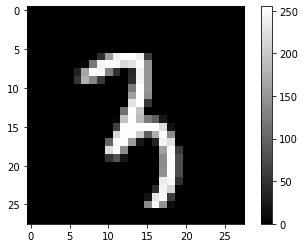

In [12]:
sample_image = numpy_images[0].transpose(2,0,1)

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sample_image[0])
plt.colorbar()
plt.grid(False)
plt.show()
